In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Instacart Market Basket Analysis</h3>
    <p><br> This notebook will be entirely based on EDA analysis. <br><br> The entire project, in turn, will include elements of Feature Engineering and data processing. <br><br> Finally, Logistic Regression models and tree-based models will be applied to predict whether a given product will be reordered.</p>
</div>

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import tensorflow as tf
import polars as pl
import missingno as msno
import numpy as np
from sklearn.preprocessing import StandardScaler

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Read csv file to analysis</h3>
</div>


In [5]:
base_path = "/kaggle/input/instacart-market-basket-analysis/"
aisles = pd.read_csv(base_path + "aisles.csv") # 
departments = pd.read_csv(base_path + "departments.csv") # 
orders = pd.read_csv(base_path + "orders.csv") # 
products = pd.read_csv(base_path + "products.csv") # 
order_prior = pd.read_csv(base_path + "order_products__prior.csv") # 
order_train = pd.read_csv(base_path + "order_products__train.csv") #

In [6]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Merge departments and products table into new products</h3>
</div>


In [8]:
new_products = departments.merge(products, on='department_id')
new_products = new_products.merge(aisles, on='aisle_id')
new_products.head()

,department_id,department,product_id,product_name,aisle_id,aisle
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals
1,1,frozen,8,Cut Russet Potatoes Steam N' Mash,116,frozen produce
2,1,frozen,12,Chocolate Fudge Layer Cake,119,frozen dessert
3,1,frozen,18,Pizza for One Suprema Frozen Pizza,79,frozen pizza
4,1,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",38,frozen meals


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Merge orders and order prior table into orders new</h3>
</div>


In [9]:
orders_new = orders.merge(order_prior, on='order_id', how='left')
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Merge orders new and new products table into onp</h3>
</div>


In [10]:
onp = orders_new.merge(new_products, on='product_id')
onp.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,aisle_id,aisle
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,7,beverages,Soda,77,soft drinks
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,16,dairy eggs,Organic Unsweetened Vanilla Almond Milk,91,soy lactosefree
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,19,snacks,Original Beef Jerky,23,popcorn jerky
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,19,snacks,Aged White Cheddar Popcorn,23,popcorn jerky
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,17,household,XL Pick-A-Size Paper Towel Rolls,54,paper goods


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Frequency table to later make a line plot analysis</h3>
</div>


In [11]:
freq = onp.groupby(["order_hour_of_day", "department"]).size().unstack()


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Hourly Purchase Patterns by Department</h3>
    <p><br>In this part of the project, I analyze how the frequency of purchases varies in different store departments depending on the time of day. </br> <br> The goal of this analysis is to determine whether specific product categories have characteristic times when they are bought more or less frequently. <br><br> This can help better understand customer behavior and how different types of products fit into the daily rhythm.</br> 
<br> The charts show that each department has its own distinct activity profile - for example, bread is mainly purchased in the morning, frozen foods and alcohol after work, and fruits and vegetables throughout most of the day. </p>
</div>


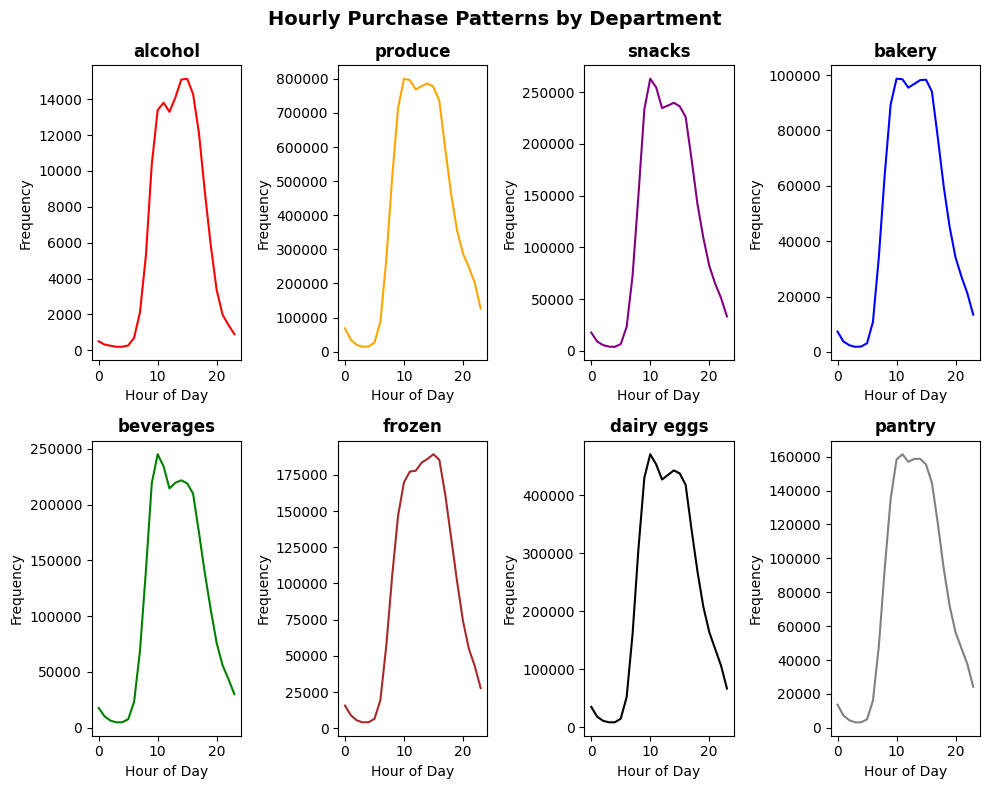

In [12]:
fig, axes = plt.subplots(figsize=(10, 8), nrows=2, ncols=4)
for ax, col, color in zip(axes.flatten(), ["alcohol", "produce", "snacks", "bakery", "beverages", "frozen", "dairy eggs", "pantry"], ["red", "orange", "purple", "blue", "green", "brown", "black", "gray"]):
    sns.lineplot(data=freq, x="order_hour_of_day", y=col, errorbar=None, ax=ax, color=color)
    ax.set_title(col, weight='bold')
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Frequency")
fig.suptitle("Hourly Purchase Patterns by Department", weight="bold", fontsize=14)
plt.tight_layout()
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Top 15 most frequently ordered products and aisle</h3>
</div>


In [48]:
top_15_product = onp.groupby(by=['product_name']).size().sort_values(ascending=False).reset_index(name='value')[:10] # inferno_r
top_15_aisle = onp.groupby(by=['aisle']).size().sort_values(ascending=False).reset_index(name='value')[:10]

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Function to create barplot</h3>
</div>


In [ ]:
# Top products 
def barplot_top(i, top_15, title, xname):
    sns.barplot(top_15, 
                x=xname, 
                y='value', 
                palette='inferno_r', 
                ax=ax[i], 
                width=0.9, 
                hue=xname, 
                legend=False, 
                zorder=3)
    ax[i].yaxis.grid(True, zorder=0)
    ax[i].set_xlabel(xname)
    ax[i].set_ylabel('count')
    ax[i].set_title(title)
    for bar in ax[i].patches:
        value = bar.get_height()
    ax[i].set_xticks(ax[i].get_xticks())
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
    ax[i].set_ylim(0, top_15['value'].max() * 1.2)

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Most frequently ordered products and aisles</h3>
        <p><br> The results show that among products, fresh fruits and vegetables (e.g., bananas, strawberries, avocado) dominate, while among aisles the sections related to fresh products, dairy, and beverages are the most popular.</p>
        
</div>



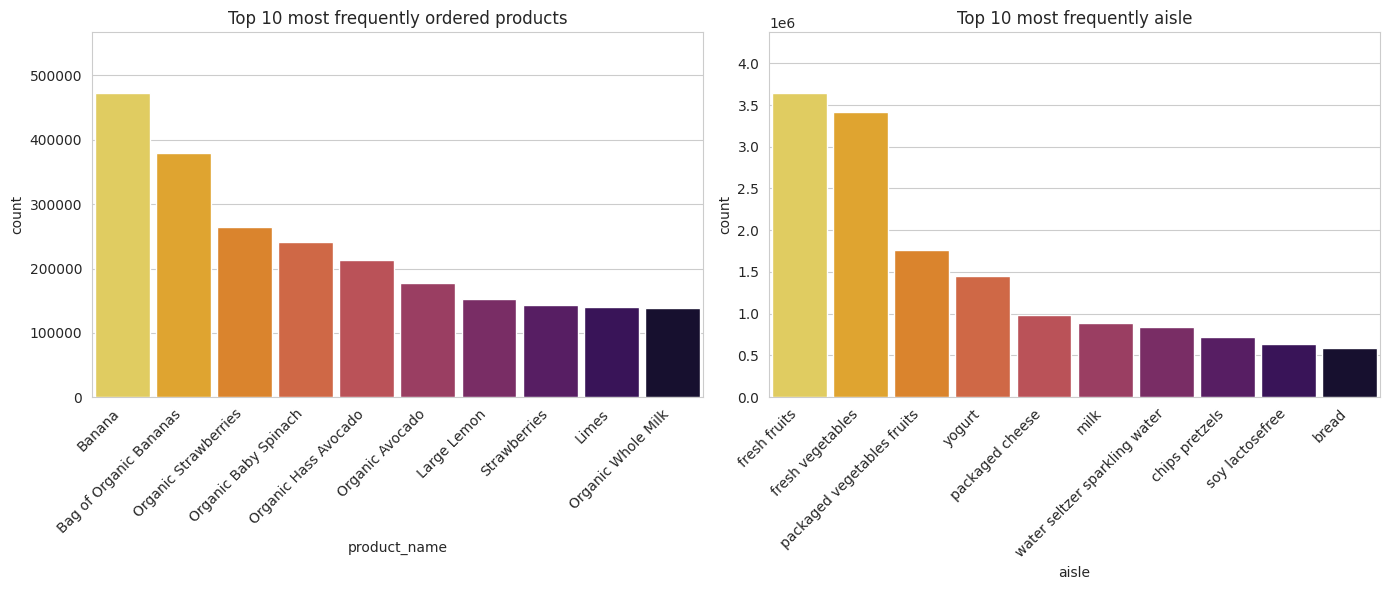

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
barplot_top(0, top_15_product, 'Top 10 most frequently ordered products', 'product_name') 
barplot_top(1, top_15_aisle, 'Top 10 most frequently aisle', 'aisle') 
plt.tight_layout()
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Analyses of hours and days of the week</h3>
        <p><br> The first chart shows the number of orders at different hours. <br><br> There is a clear increase in activity from the morning hours, with the highest intensity around 10:00, followed by a gradual decline in the afternoon and evening hours.

The second chart presents the number of orders divided by days of the week. <br><br>  Most orders are placed at the beginning of the week (Monday and Tuesday), while the fewest are on Thursday and Friday. <br><br> The weekend maintains a moderate level of activity.</p>
        
</div>


In [32]:
x = orders['order_hour_of_day'].value_counts().sort_index().reset_index()['order_hour_of_day'].to_numpy()
y = orders['order_hour_of_day'].value_counts().sort_index().reset_index()['count'].to_numpy()
val = np.where(y == max(y))[0][0]

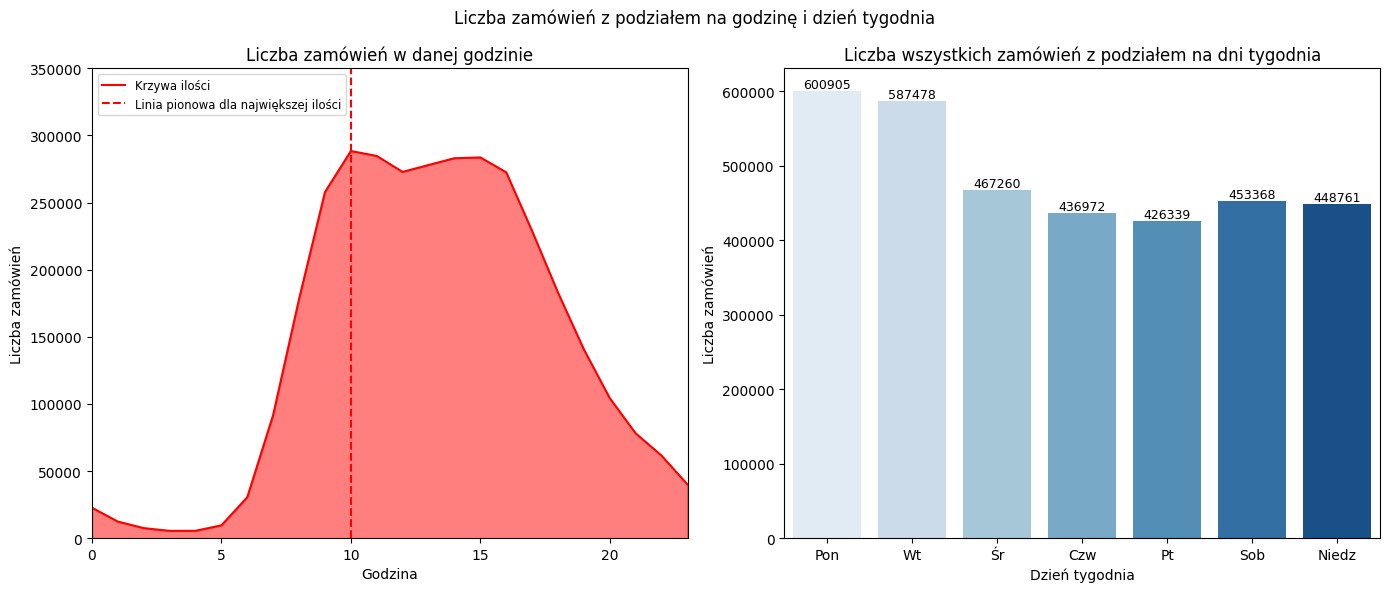

In [33]:
# --- FIGURE ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

orders_per_hour = (
    orders['order_hour_of_day']
    .value_counts()
    .sort_index()
)

orders_per_hour.plot(
    ax=ax[0],
    color='red',
    label='Krzywa ilości'
)

ax[0].axvline(
    x=val,
    ymin=0,
    ymax=max(y),
    color='red',
    linestyle='--',
    label='Linia pionowa dla największej ilości'
)

ax[0].fill_between(
    x,
    y,
    color='red',
    alpha=0.5
)

ax[0].set_title('Liczba zamówień w danej godzinie')
ax[0].set_xlabel('Godzina')
ax[0].set_ylabel('Liczba zamówień')
ax[0].set_xlim(0, 23)
ax[0].set_ylim(0, 350_000)
ax[0].legend(loc='upper left', fontsize='small')


day_map = {
    0: 'Pon',
    1: 'Wt',
    2: 'Śr',
    3: 'Czw',
    4: 'Pt',
    5: 'Sob',
    6: 'Niedz'
}

data = (
    orders['order_dow']
    .value_counts()
    .sort_index()
    .reset_index()
)

data['week'] = data['order_dow'].map(day_map)

ax2 = sns.barplot(
    data=data,
    x='week',
    y='count',
    hue='week', 
    palette='Blues',
    legend=False, 
    ax=ax[1]
)

for bar in ax2.patches:
    value = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f'{value:.0f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax[1].set_title('Liczba wszystkich zamówień z podziałem na dni tygodnia')
ax[1].set_xlabel('Dzień tygodnia')
ax[1].set_ylabel('Liczba zamówień')


plt.suptitle('Liczba zamówień z podziałem na godzinę i dzień tygodnia')
plt.tight_layout()
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Merging new products and order prior into new products prior</h3>
</div>


In [15]:
new_products_prior = new_products.merge(order_prior, on='product_id')

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Create temp to analyse popularity and reorder rate per department</h3>
</div>


In [16]:
temp = new_products_prior.groupby(by = ['department', 'reordered']).size().unstack()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Analyses popularity and reorder rate per department</h3>
        <p><br> The barplot show how many times products from a given department were reordered (i.e., the number of instances where reordered = 1). <br><br> This measures pure popularity - the higher the bar, the more often customers return for products from that department.

The line (reorder rate) shows what percentage of all orders in a given department are reorders. <br><br> This measures customers' tendency to repeat purchases, regardless of the size of the department itself. <br><br> This way, you can see which departments have the most loyal customers.</p>
        
</div>


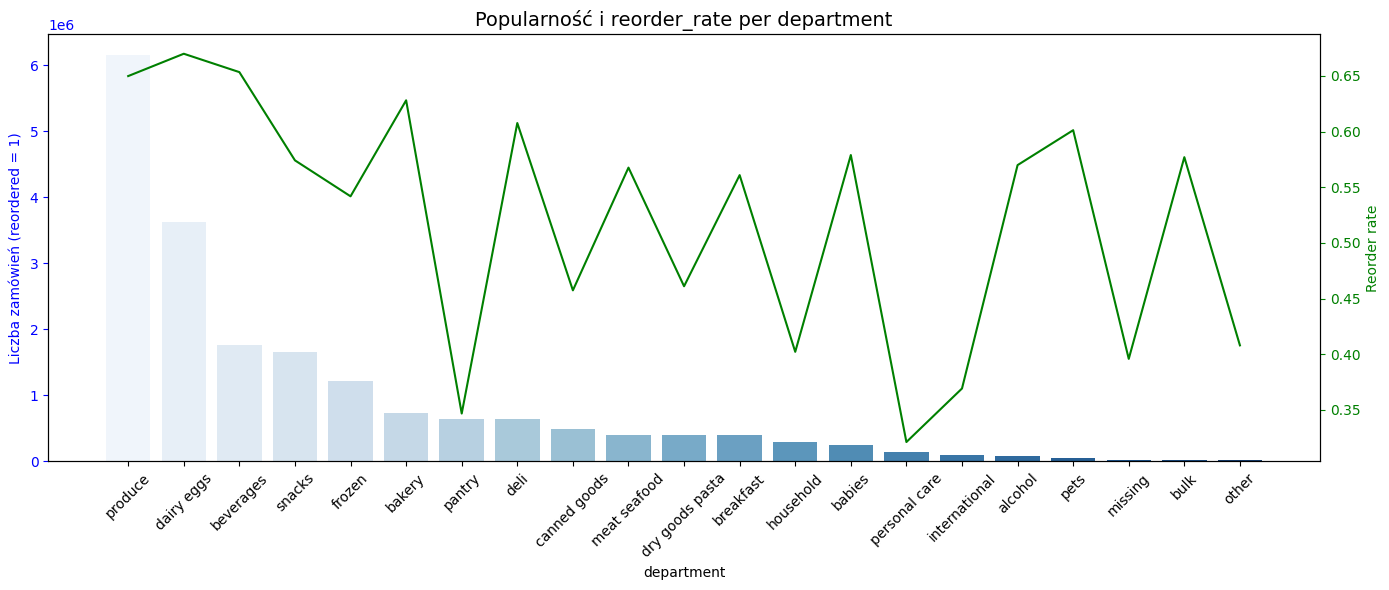

In [18]:
temp['reorder_rate'] = temp[1] / (temp[0] + temp[1])
temp = temp.sort_values(by=1, ascending=False)
fig, ax = plt.subplots(figsize=(14, 6))
ax2 = ax.twinx()
sns.barplot(x=temp.index, y=temp[1], palette='Blues', ax=ax, label='Liczba zamówień', hue=temp.index, legend=False)
ax2.plot(temp.index, temp['reorder_rate'], color='green', label='Reorder rate')
ax.set_ylabel("Liczba zamówień (reordered = 1)", color='blue')
ax2.set_ylabel("Reorder rate", color='green')
ax.set_title("Popularność i reorder_rate per department", fontsize=14)
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='green')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Heatmap analyses (hour × day of the week) and correlations</h3>
        <p> <br> The first heatmap shows at what hours and on which days of the week customers place the most orders. <br><br> The highest order volume occurs in the morning and early afternoon hours, especially at the beginning of the week (Monday–Tuesday). <br><br> This analysis helps to better understand the shopping rhythm of customers.

The second heatmap shows the correlations between selected variables, or information about reordering. <br><br>Correlations help to assess which variables are related and may be important when building a predictive model. <br><br> For example, a positive correlation between order_number and reordered suggests that the more orders a customer has placed in the past, the higher the chance they will reorder the same products.</p>
        
</div>


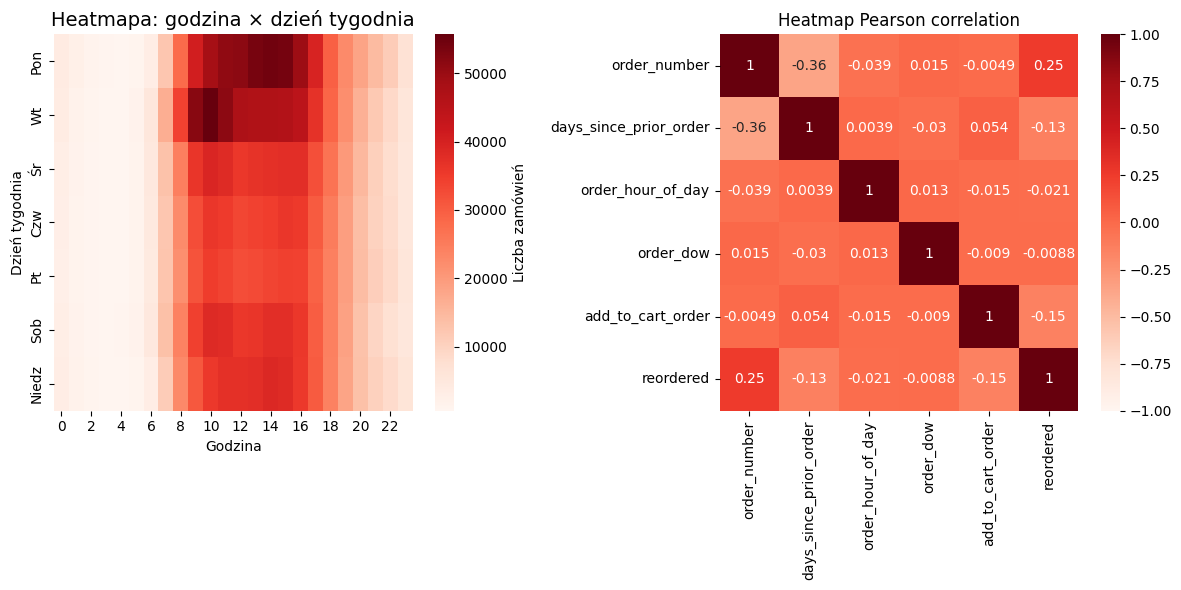

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
orders['week'] = orders['order_dow'].map(day_map)
table = orders.groupby(['week', 'order_hour_of_day']).size().unstack()
ordered_days = ['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Niedz']
table = table.reindex(ordered_days)
sns.heatmap(table, cmap='Reds', cbar_kws={'label': 'Liczba zamówień'}, ax=ax[0])
ax[0].set_title("Heatmapa: godzina × dzień tygodnia", fontsize=14)
ax[0].set_xlabel("Godzina")
ax[0].set_ylabel("Dzień tygodnia")

columns = ['order_number', 'days_since_prior_order', 'order_hour_of_day', 'order_dow', 'add_to_cart_order', 'reordered']
temp = orders_new.dropna() 
corr = temp[columns].corr(method='pearson')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='Reds', ax=ax[1])
ax[1].set_title('Heatmap Pearson correlation') 
plt.tight_layout() 
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Loads the file after Feature Engineering</h3>
</div>


In [12]:
# Feature Engineering 


col = [
    "days_since_prior_order",
    "add_to_cart_order",
    "times_user_bought_product_so_far",
    "orders_since_last_purchase",
    "user_avg_days_between_orders_so_far",
    "user_avg_basket_size_so_far",
    "product_total_purchases_so_far",
    "product_unique_users_so_far",
    "user_product_reorder_rate_so_far", 
    "order_number",	
    "order_dow",	
    "order_hour_of_day", 
    "reordered"
]

train = pd.read_parquet(
    "/kaggle/input/datasets/marcin123321/training2/upo_final.parquet",
).sample(2_000_000)

train[col].head(15)

,days_since_prior_order,add_to_cart_order,times_user_bought_product_so_far,orders_since_last_purchase,user_avg_days_between_orders_so_far,user_avg_basket_size_so_far,product_total_purchases_so_far,product_unique_users_so_far,user_product_reorder_rate_so_far,order_number,order_dow,order_hour_of_day,reordered
2084454,6.0,3,3,4,9.033333,9.404040,7291,4414,0.666667,12,4,18,1
13964034,15.0,7,7,3,8.655340,12.438914,356639,71238,0.857143,24,6,15,1
29686825,14.0,5,0,0,17.000000,6.888889,157,148,NaN,3,5,18,0
7841891,26.0,14,1,2,14.009615,22.406780,4462,2951,0.000000,8,0,10,1
19952491,12.0,4,1,2,14.222222,8.777778,11250,9753,0.000000,3,6,13,1
12817700,0.0,1,1,27,2.827519,10.761450,21524,11448,0.000000,68,6,23,1
2566981,30.0,27,0,0,19.913043,21.424779,2396,1785,NaN,6,0,11,0
18040724,18.0,41,0,0,18.000000,38.086957,786,706,NaN,2,0,15,0
9064445,7.0,15,0,0,15.079114,18.835294,450,315,NaN,20,2,14,0
18959664,17.0,5,0,0,11.941176,4.333333,2681,1896,NaN,6,1,19,0


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Change NaN to 0</h3>
</div>


In [13]:
temp_train = train.copy()
temp_train['user_product_reorder_rate_so_far'] = \
    temp_train['user_product_reorder_rate_so_far'].fillna(0)


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Pearson correlation to check the relationships between variables for modeling</h3>
</div>


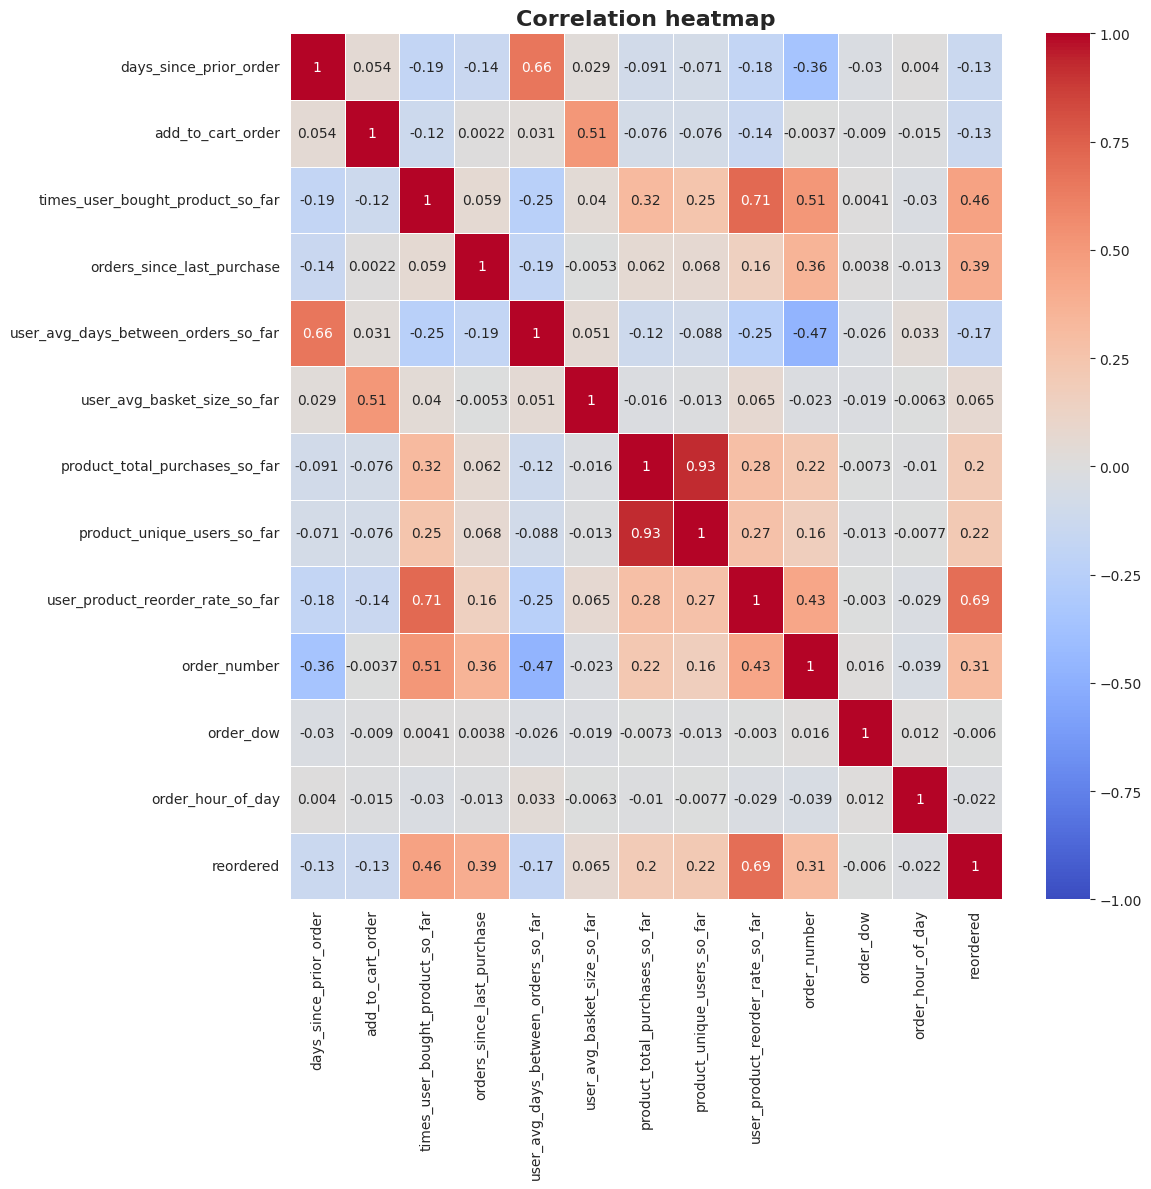

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
corr2 = temp_train[col].corr(method='pearson')
sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, cmap='coolwarm', ax=ax, linewidths=0.5)
plt.title("Correlation heatmap", fontsize=16, weight="bold")
plt.tight_layout() 
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Reorder rate per hour and per day of week</h3>
</div>


In [35]:
peak_hour = hour_reorder.idxmax() 
peak_hour

np.int64(7)

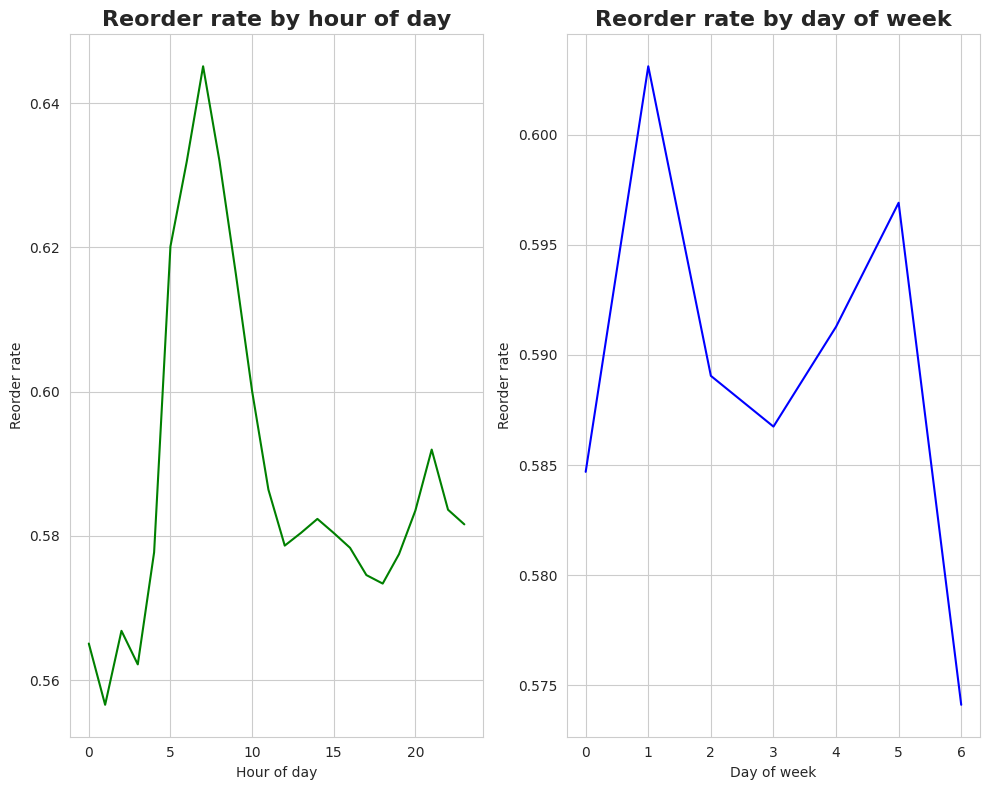

In [46]:
hour_reorder = train.groupby("order_hour_of_day")["reordered"].mean()
dow_reorder = train.groupby("order_dow")["reordered"].mean()
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
sns.lineplot(x=hour_reorder.index, y=hour_reorder.values, color='green', ax=ax[0])
ax[0].set_title("Reorder rate by hour of day", fontsize=16, weight="bold")
ax[0].set_xlabel("Hour of day")
ax[0].set_ylabel("Reorder rate")
sns.lineplot(x=dow_reorder.index, y=dow_reorder.values, ax=ax[1], color='blue')
ax[1].set_title("Reorder rate by day of week", fontsize=16, weight="bold")
ax[1].set_xlabel("Day of week")
ax[1].set_ylabel("Reorder rate")
plt.tight_layout()
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Pareto chart</h3>
    
<br> Pareto chart confirms a strong long‑tail effect in product popularity. <br><br> A small fraction of products accounts for the majority of total purchases, while most products are bought only occasionally. <br><br> Approximately 20% of items generate around 80% of all orders, which is typical for e‑commerce datasets. <br><br> This insight is important for feature engineering and model interpretation, as rare products may be harder to predict accurately.
</div>


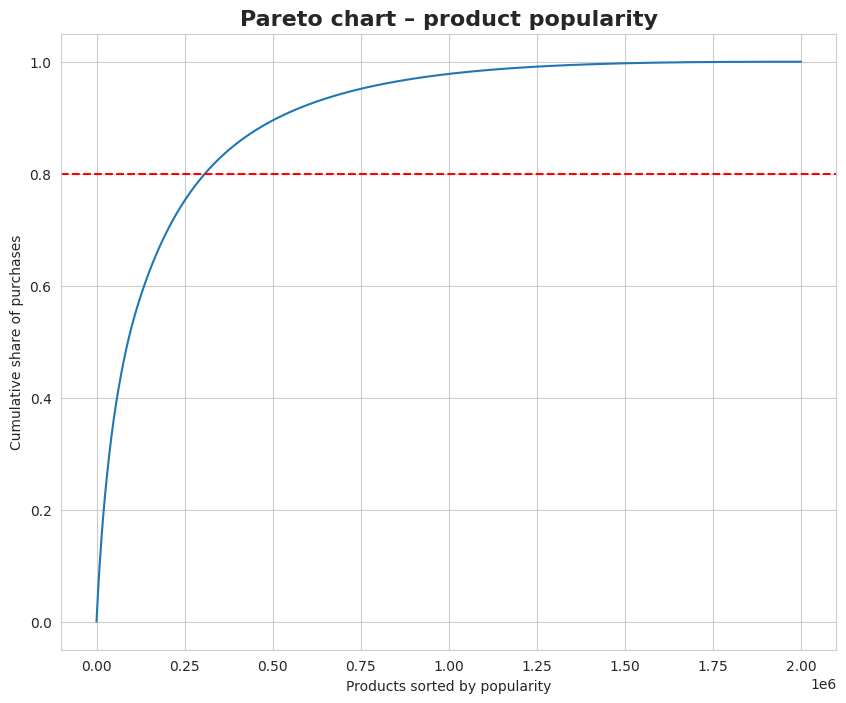

In [56]:
product_counts = train["product_total_purchases_so_far"].sort_values(ascending=False).reset_index(drop=True)
cum = product_counts.cumsum() / product_counts.sum()
plt.figure(figsize=(10,8))
plt.plot(cum.values)
plt.axhline(0.8, color="red", linestyle="--")
plt.title("Pareto chart – product popularity", fontsize=16, weight="bold")
plt.xlabel("Products sorted by popularity")
plt.ylabel("Cumulative share of purchases")
plt.show()


In [59]:
train.head(1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,reordered,days_since_prior_order,add_to_cart_order,product_id,times_user_bought_product_so_far,last_order_number,orders_since_last_purchase,user_avg_days_between_orders_so_far,user_avg_basket_size_so_far,product_total_purchases_so_far,product_unique_users_so_far,user_product_reorder_rate_so_far
2084454,1852748,106515,12,4,18,1,6.0,3,47042,3,8.0,4,9.033333,9.40404,7291,4414,0.666667


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Product popularity vs unique users</h3>
    
<br> The more purchases a product has, the more unique users have bought it
<br><br> Popular products are bought by many users.
</div>


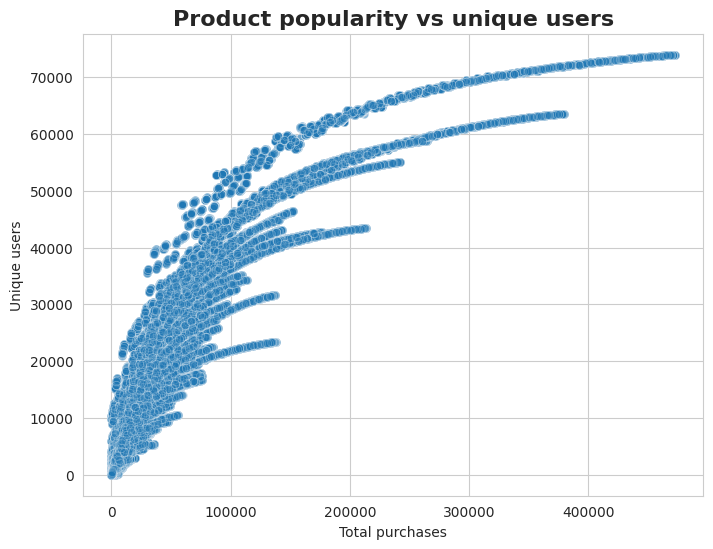

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="product_total_purchases_so_far",
    y="product_unique_users_so_far",
    data=train,
    alpha=0.3
)
plt.title("Product popularity vs unique users", fontsize=16, weight="bold")
plt.xlabel("Total purchases")
plt.ylabel("Unique users")
plt.show()


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Boxplot EDA summary</h3>
        <p> <br> In the conducted exploratory data analysis, I observed several key patterns characteristic of e-commerce shopping behaviors. <br><br> Most numerical variables exhibit strong skewness, as evidenced by histograms and boxplots - users most often place orders in short intervals, add consistent, "favorite" products in early positions of the cart, and make relatively small purchases. <br><br> Products, on the other hand, follow the classic "long tail" effect: a small group is very popular, while most are bought sporadically. <br><br> Analysis of reorder rate reveals a clear polarization - some products are bought regularly, while others only once. <br><br> Additionally, distributions of hours and days of the week show predictable patterns of user shopping activity. <br><br> The overall EDA confirms that the data is highly heterogeneous, nonlinear, and contains many features with high predictive value</p>
        
</div>


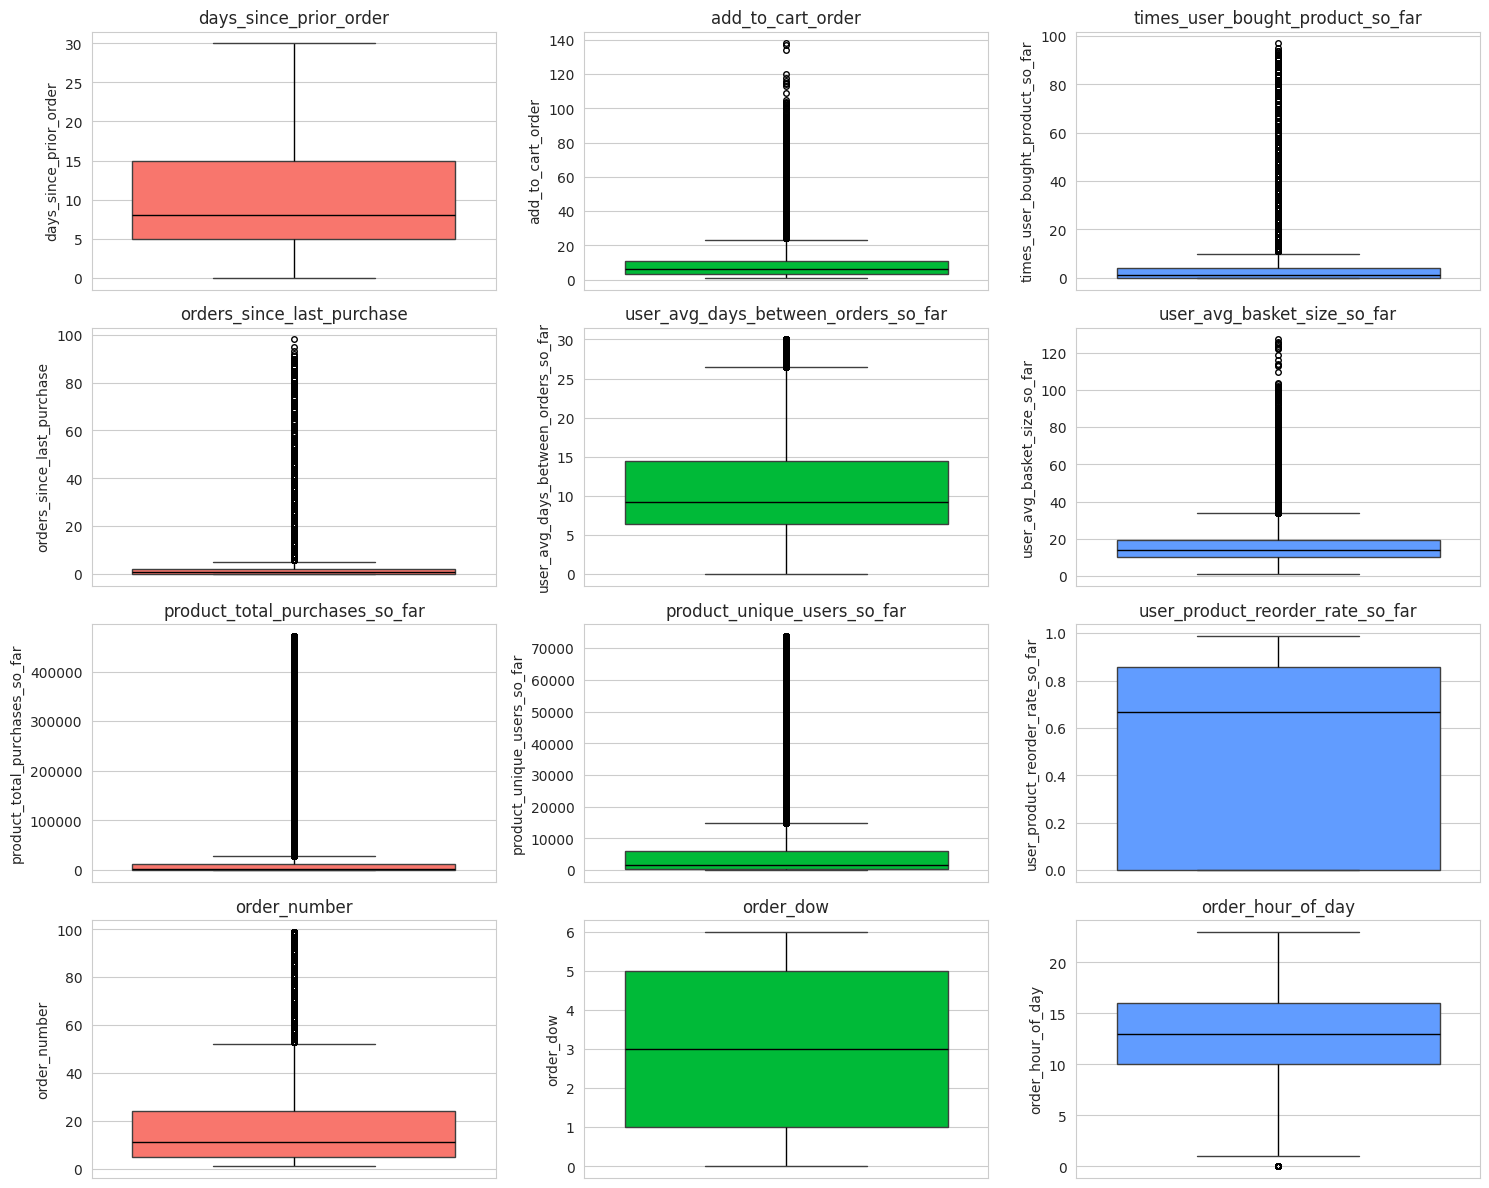

In [15]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
col_temp = [temp for temp in col if temp != 'reordered']
axes = axes.flatten()
my_colors = {0: '#f8766d', 1: '#00ba38', 2: '#619cff'}
palette = sns.color_palette("Blues", len(col))
for i, c in enumerate(col_temp):
    sns.boxplot(y=train[c], 
                ax=axes[i], 
                patch_artist=True,
                showmeans=False,
                whiskerprops=dict(color='black'),
                flierprops=dict(marker='o', markeredgecolor='black', markersize=4),
                medianprops=dict(color='black'),
                boxprops=dict(facecolor=my_colors[i%3]),
                #boxprops=dict(facecolor="#2E4057"),
                meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
               )
    axes[i].set_title(c)
plt.tight_layout()
plt.show()


<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Variable histogram without log scaling</h3>
        <p> <br>Most variables have highly skewed distributions, which is typical for purchase data. For example:

<ul style="padding-left: 40px; font-size: 20px; line-height: 1.6;">

  <li><strong>days_since_prior_order</strong> – most orders are placed after short intervals, while long gaps occur rarely. The distribution is strongly right‑skewed, reflecting regular purchasing habits among users.</li>

  <li><strong>add_to_cart_order</strong> – products most often appear in the cart in early positions, indicating the presence of “favorite” items that users tend to add first. Higher positions occur less frequently, showing that most baskets follow a consistent structure.</li>

  <li><strong>order_number</strong> – the distribution shows that many users have a relatively small number of orders, while only a smaller group consists of highly active customers. This is typical for e‑commerce platforms, where new or low‑activity users dominate.</li>

  <li><strong>product_total_purchases_so_far</strong> and <strong>product_unique_users_so_far</strong> – both variables confirm the classic “long tail” effect: a small number of products are extremely popular and purchased by many users, whereas the majority of products have low purchase counts and limited user engagement.</li>

  <li><strong>user_avg_basket_size_so_far</strong> – most users tend to make relatively small purchases, and large baskets are less common. The distribution is clearly skewed, reflecting typical online shopping behavior.</li>

  <li><strong>user_product_reorder_rate_so_far</strong> – the distribution concentrated around 0 and 1 indicates that some products are purchased repeatedly by the same users, while others are bought only once. This makes the feature highly informative for predicting reorder behavior.</li>

</ul></p>
        
</div>


<Figure size 1500x1000 with 0 Axes>

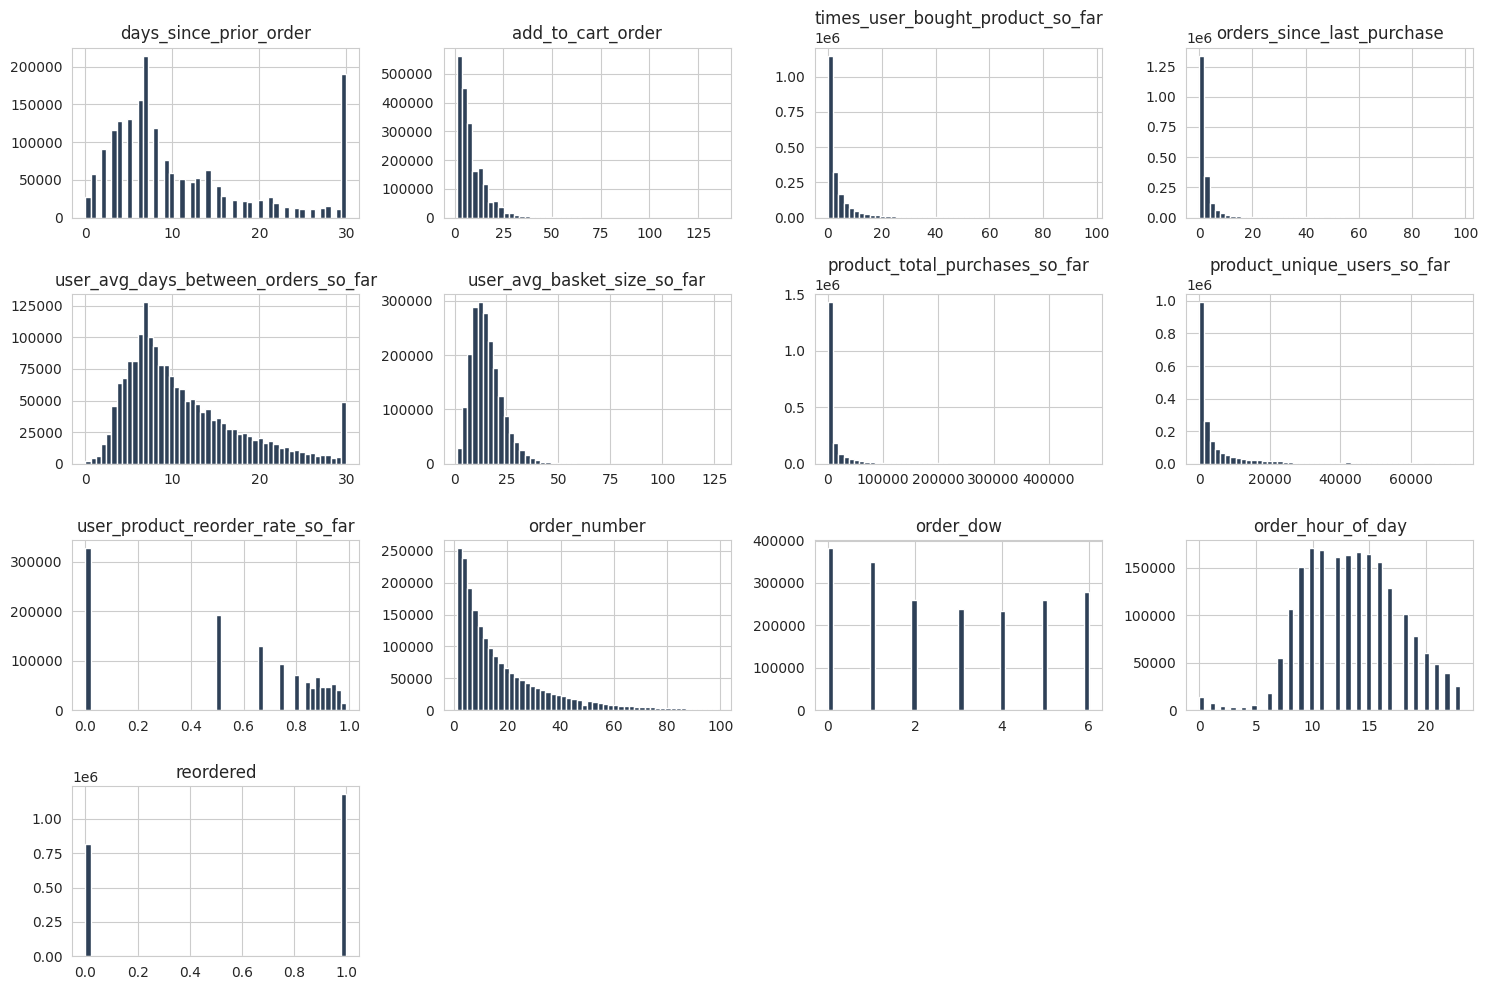

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
train[col].hist(
    bins=50,
    figsize=(15,10),
    color="#2E4057",
    edgecolor="white"
)
plt.tight_layout()
plt.show()

<div style="
    border: 2px solid black;
    background: #e8e8ff;
    padding: 20px;
    border-radius: 12px;
    font-family: 'Arial'; 
    font-size: 20px;
">
    <h3 style="margin: 0;
        font-size: 35px;">Variable histogram with log scaling</h3>
        
        
</div>


In [16]:
log_cols = [ "product_total_purchases_so_far", 
            "product_unique_users_so_far", 
            "times_user_bought_product_so_far", 
            "orders_since_last_purchase", 
            "user_avg_days_between_orders_so_far", 
            "user_avg_basket_size_so_far", 
            "days_since_prior_order", 
            "add_to_cart_order" ]
train_log = train.copy()
train_log[log_cols] = train_log[log_cols].clip(lower=0)
train_log[log_cols] = train_log[log_cols].apply(np.log1p)

<Figure size 1500x1000 with 0 Axes>

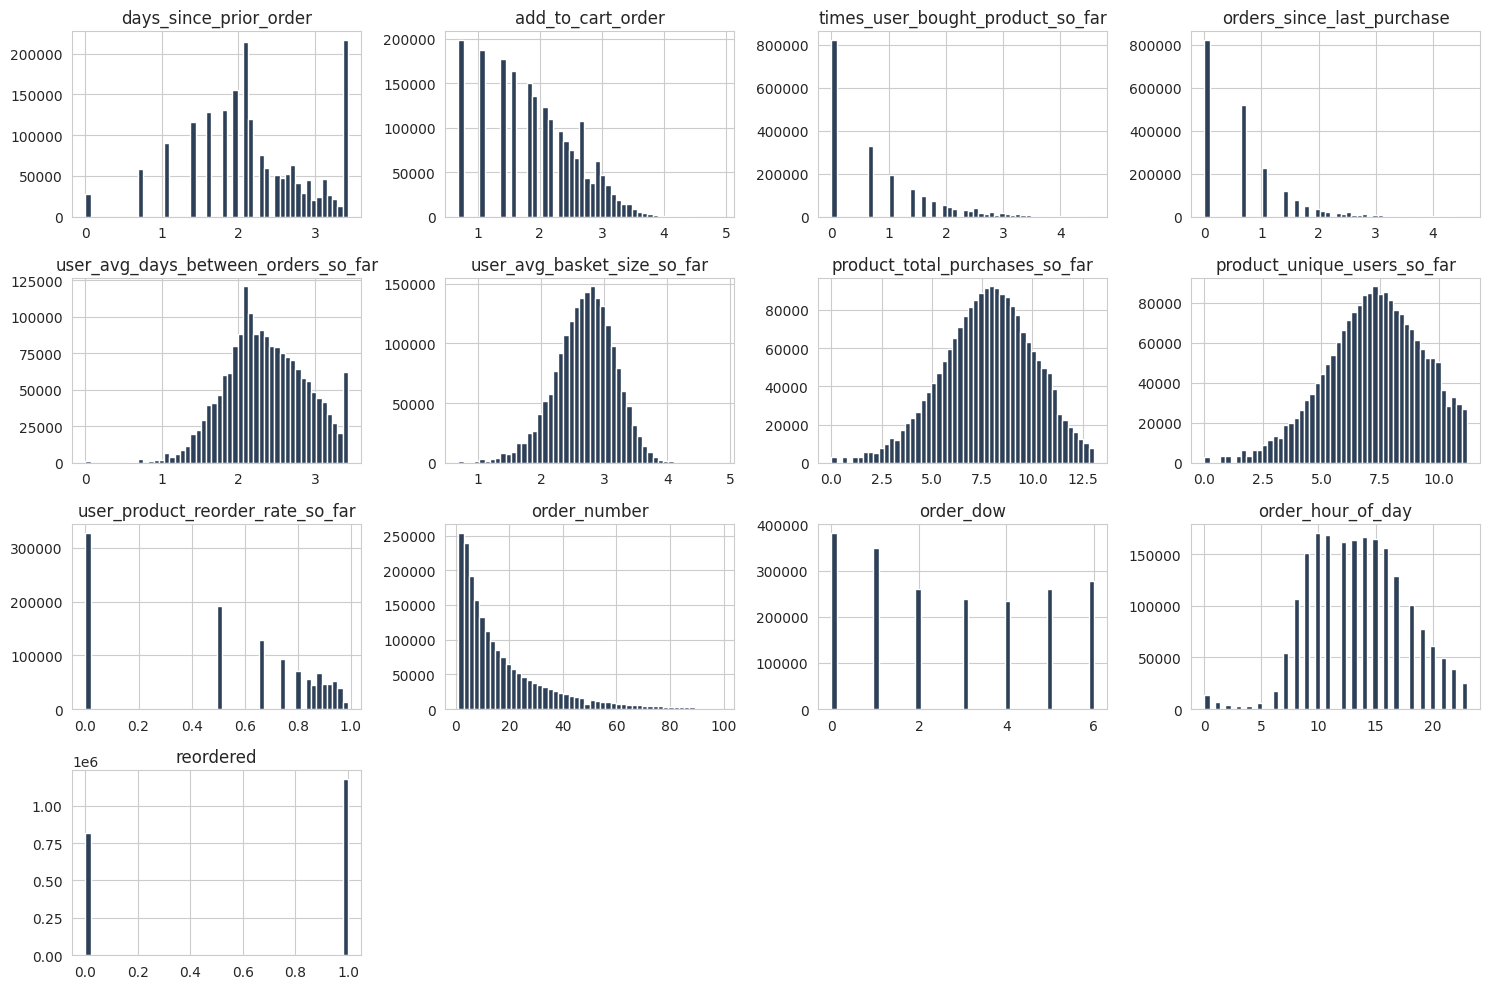

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
train_log[col].hist(
    bins=50,
    figsize=(15,10),
    color="#2E4057",
    edgecolor="white"
)
plt.tight_layout()
plt.show()